In [490]:
# Importing pandas and other libraries for DataSet

In [491]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [492]:
df=pd.read_csv('powerplant.csv')

In [493]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
# Checking Data Types

In [495]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [496]:
# Checking Null Values

In [497]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [498]:
# There Are so manu Null values are present

In [499]:
# Now Applying Label Encoder to convert object datatype into int

In [500]:
# Droping those columns which have more than 50% missing Data

In [501]:
df.drop(['estimated_generation_gwh','wepp_id','generation_gwh_2013','other_fuel1','other_fuel2','other_fuel3','generation_data_source','owner','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019'],axis=1,inplace=True)

In [502]:
from sklearn.impute import SimpleImputer

In [503]:
list2=['latitude','longitude','commissioning_year','year_of_capacity_data']
si=SimpleImputer(strategy='mean')
for i in list2:
     df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [504]:
imp=SimpleImputer(strategy='most_frequent')
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [505]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [506]:
# Now No Null Values Are Present in our Data Set

In [507]:
# Now Applying Label Encoder on Those columns which are object datatype

In [508]:
from sklearn.preprocessing import LabelEncoder

In [509]:
le=LabelEncoder()

In [510]:
list1=['country','country_long','name','gppd_idnr','primary_fuel','source','url','geolocation_source',]

In [511]:
for i in list1:
    df[i]=le.fit_transform(df[i])

In [512]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,0,0,0,657,2.5,28.1839,73.2407,6,2011.000000,109,128,1,2019.0
1,0,0,1,519,98.0,24.7663,74.6090,1,1997.091082,174,173,2,2019.0
2,0,0,2,853,39.2,21.9038,69.3732,7,1997.091082,21,205,2,2019.0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2,2019.0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.000000,22,58,2,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2016.000000,22,58,2,2019.0
903,0,0,903,822,3.0,12.8932,78.1654,6,1997.091082,77,22,0,2019.0
904,0,0,904,891,25.5,15.2758,75.5811,7,1997.091082,21,260,2,2019.0
905,0,0,905,539,80.0,24.3500,73.7477,1,1997.091082,59,82,2,2019.0


In [513]:
df.dtypes

country                    int32
country_long               int32
name                       int32
gppd_idnr                  int32
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel               int32
commissioning_year       float64
source                     int32
url                        int32
geolocation_source         int32
year_of_capacity_data    float64
dtype: object

In [708]:
df['capacity_mw'].value_counts()

5.00       37
600.00     20
1200.00    19
15.00      19
10.00      19
           ..
855.00      1
32.50       1
119.80      1
21.84       1
106.60      1
Name: capacity_mw, Length: 330, dtype: int64

In [713]:
df['capacity_mw'].nunique()

330

In [714]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01, 2.40000e+01,
       6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00, 1.65000e+01,
       1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00, 7.05000e+02,
       2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03, 5.10000e+02,
       6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01, 3.15000e+02,
       3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02, 9.00000e+01,
       1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02, 2.28000e+01,
       2.52000e+01, 1.80000e+01, 1.70000e+03, 2.60000e+01, 4.10000e+01,
       1.37900e+03, 1.50000e+01, 3.40000e+01, 1.60000e+01, 5.00000e+02,
       8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01, 6.96000e+01,
       6.00000e+00, 7.50000e+02, 4.00000e+01, 1.65000e+02, 7.000

In [514]:
# So our data is now converted into numerical format

In [515]:
# Now importing libraries for some visualisation

In [516]:
import seaborn as sns
import matplotlib.pyplot as plt

In [517]:
m1=df.corr()['capacity_mw'].sort_values(ascending=False)
m1

capacity_mw              1.000000
commissioning_year       0.274292
geolocation_source       0.204865
longitude                0.195882
name                     0.060240
latitude                 0.050984
source                  -0.242122
url                     -0.243830
gppd_idnr               -0.335742
primary_fuel            -0.380395
country                       NaN
country_long                  NaN
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

In [518]:
m2=df.corr()['primary_fuel'].sort_values(ascending=False)
m2

primary_fuel             1.000000
gppd_idnr                0.609180
url                      0.589886
source                   0.053613
name                     0.040753
latitude                -0.010204
commissioning_year      -0.126650
longitude               -0.347948
capacity_mw             -0.380395
geolocation_source      -0.483217
country                       NaN
country_long                  NaN
year_of_capacity_data         NaN
Name: primary_fuel, dtype: float64

In [519]:
# Since Few columns have no correlation with both the labels so dropping them

In [520]:
df.drop(['country','country_long','year_of_capacity_data'],axis=1,inplace=True)

In [521]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.043569,-0.014640,0.041917,0.036225
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.044059,0.416384,0.597080,-0.464174
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,-0.243830,0.204865
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.131038,-0.184275
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,-0.302985,0.252343
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,0.589886,-0.483217
commissioning_year,-0.043569,0.044059,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,0.010910,-0.007844
source,-0.014640,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,0.160144,-0.505720
url,0.041917,0.597080,-0.243830,-0.131038,-0.302985,0.589886,0.010910,0.160144,1.000000,-0.018929
geolocation_source,0.036225,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-0.505720,-0.018929,1.000000


In [522]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1997.091082,43.847850,94.469680,1.733186
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,13.016360,44.642818,70.381222,0.677151
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1997.091082,22.000000,58.000000,2.000000
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,1997.091082,22.000000,58.000000,2.000000
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,115.500000,2.000000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,303.000000,2.000000


<AxesSubplot:>

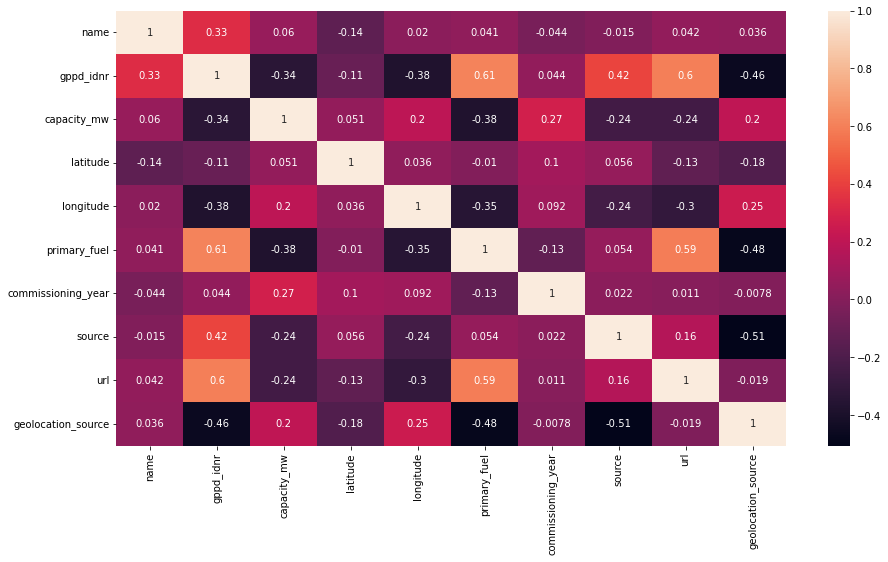

In [523]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

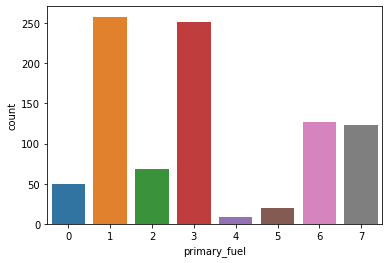

In [524]:
sns.countplot(df['primary_fuel'])

In [525]:
# It clearly shows that balancing is required

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

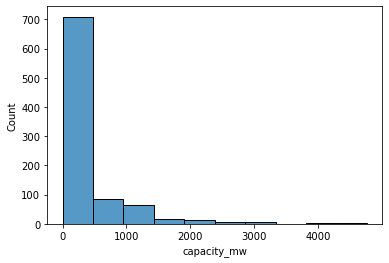

In [526]:
sns.histplot(df['capacity_mw'],bins=10)

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

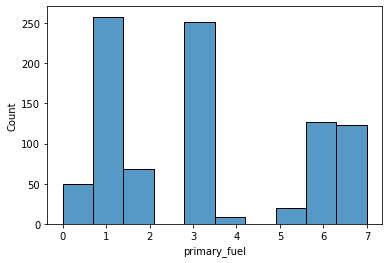

In [527]:
sns.histplot(df['primary_fuel'],bins=10)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

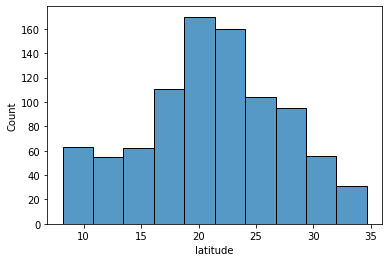

In [528]:
sns.histplot(df['latitude'],bins=10)

<AxesSubplot:xlabel='longitude', ylabel='Count'>

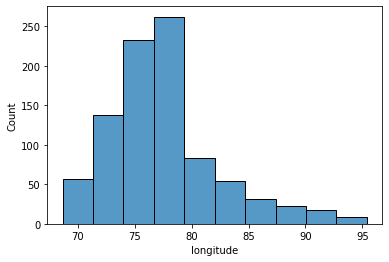

In [529]:
sns.histplot(df['longitude'],bins=10)

<AxesSubplot:xlabel='longitude', ylabel='Count'>

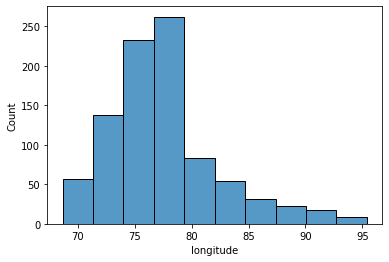

In [530]:
sns.histplot(df['longitude'],bins=10)

In [531]:
# Now Checking if our Data set is normally distributed or not

<AxesSubplot:xlabel='gppd_idnr', ylabel='Count'>

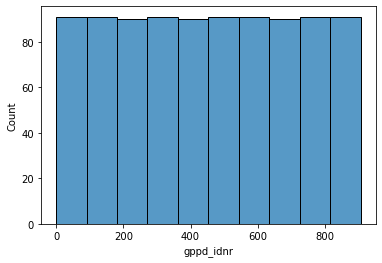

In [532]:
sns.histplot(df['gppd_idnr'],bins=10)

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

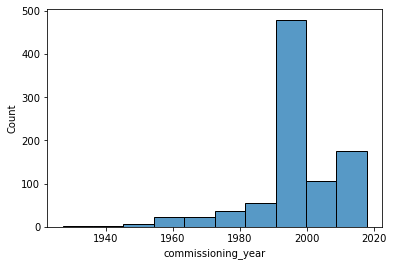

In [533]:
sns.histplot(df['commissioning_year'],bins=10)

<AxesSubplot:xlabel='source', ylabel='Count'>

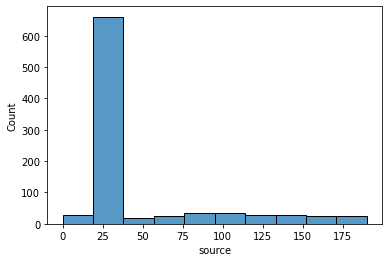

In [534]:
sns.histplot(df['source'],bins=10)

<AxesSubplot:xlabel='url', ylabel='Count'>

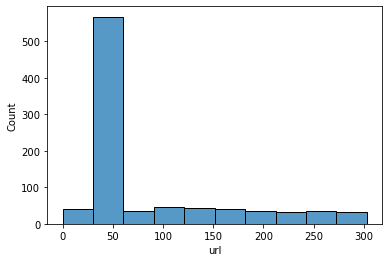

In [535]:
sns.histplot(df['url'],bins=10)

<AxesSubplot:xlabel='geolocation_source', ylabel='Count'>

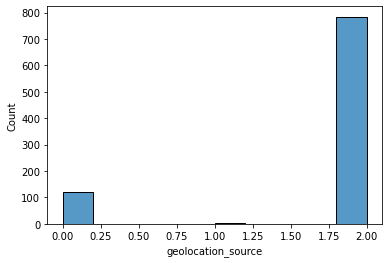

In [536]:
sns.histplot(df['geolocation_source'],bins=10)

In [537]:
# Now Doing some bivariate Analysis

<AxesSubplot:xlabel='source', ylabel='primary_fuel'>

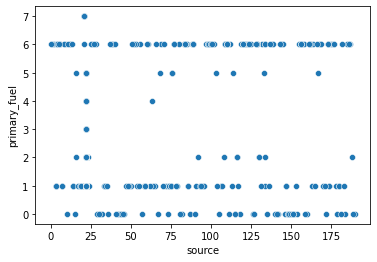

In [538]:
sns.scatterplot(x=df['source'],y=df['primary_fuel'])

<AxesSubplot:xlabel='url', ylabel='primary_fuel'>

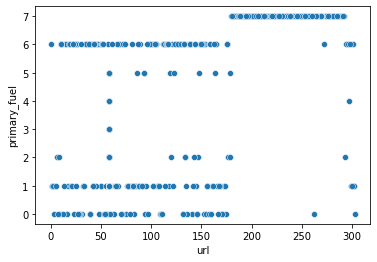

In [539]:
sns.scatterplot(x=df['url'],y=df['primary_fuel'])

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

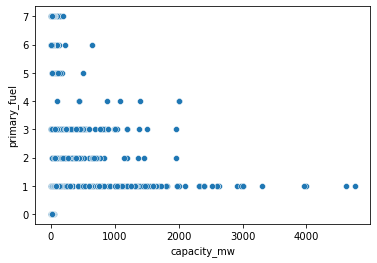

In [540]:
sns.scatterplot(x=df['capacity_mw'],y=df['primary_fuel'])

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

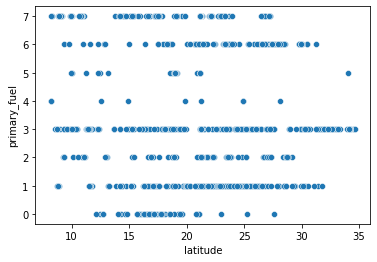

In [541]:
sns.scatterplot(x=df['latitude'],y=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

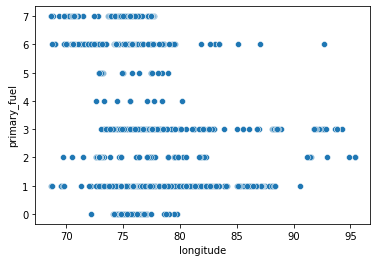

In [542]:
sns.scatterplot(x=df['longitude'],y=df['primary_fuel'])

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

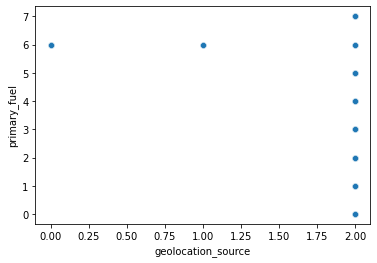

In [543]:
sns.scatterplot(x=df['geolocation_source'],y=df['primary_fuel'])

<AxesSubplot:xlabel='name', ylabel='primary_fuel'>

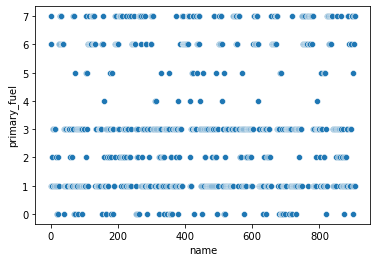

In [544]:
sns.scatterplot(x=df['name'],y=df['primary_fuel'])

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

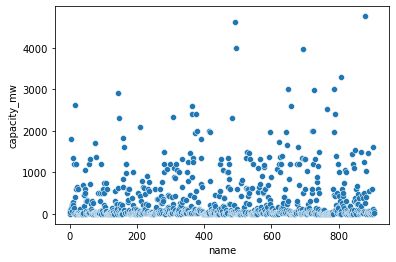

In [545]:
sns.scatterplot(x=df['name'],y=df['capacity_mw'])

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

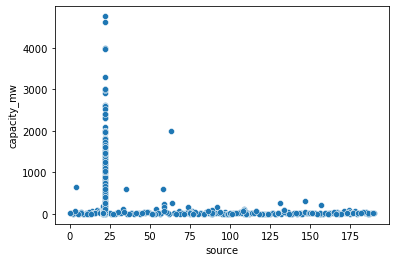

In [546]:
sns.scatterplot(x=df['source'],y=df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

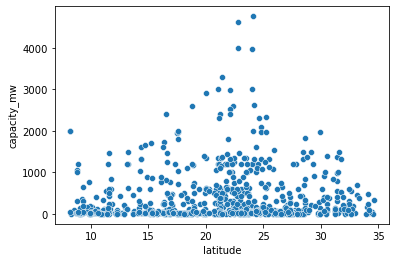

In [547]:
sns.scatterplot(x=df['latitude'],y=df['capacity_mw'])

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

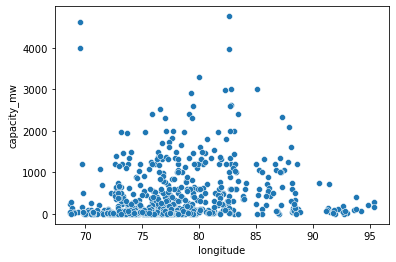

In [548]:
sns.scatterplot(x=df['longitude'],y=df['capacity_mw'])

<AxesSubplot:xlabel='url', ylabel='capacity_mw'>

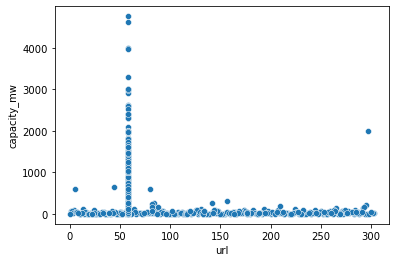

In [549]:
sns.scatterplot(x=df['url'],y=df['capacity_mw'])

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

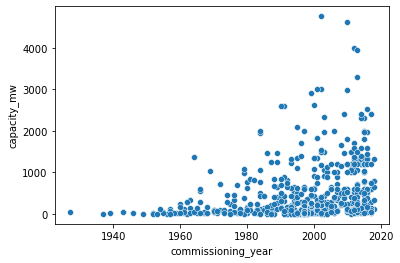

In [550]:
sns.scatterplot(x=df['commissioning_year'],y=df['capacity_mw'])

In [551]:
# Now Check the distribution of all columns if they are normally distributed or not

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

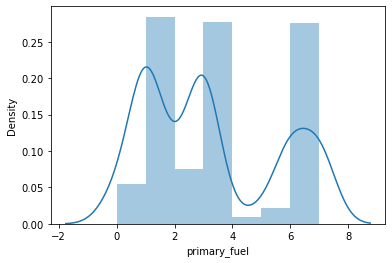

In [552]:
sns.distplot(df['primary_fuel'])   

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

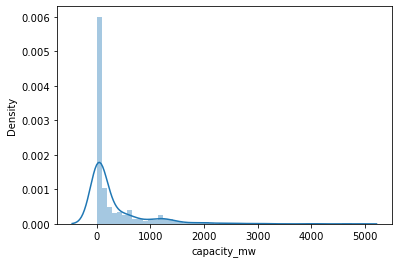

In [553]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

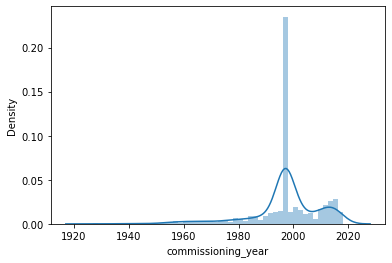

In [554]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

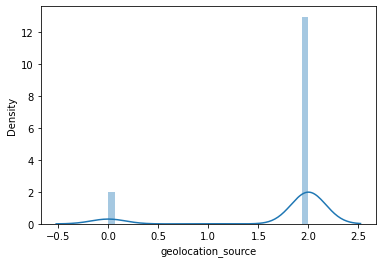

In [555]:
sns.distplot(df['geolocation_source'])

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

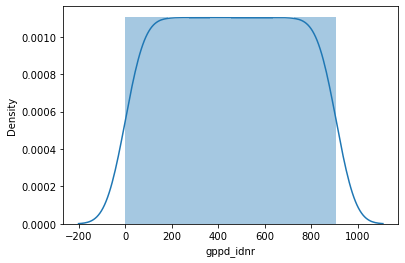

In [556]:
sns.distplot(df['gppd_idnr'])

<AxesSubplot:xlabel='url', ylabel='Density'>

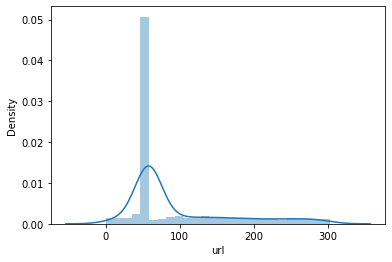

In [557]:
sns.distplot(df['url'])

<AxesSubplot:xlabel='name', ylabel='Density'>

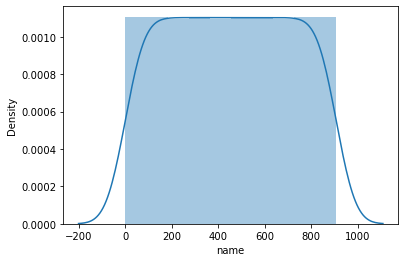

In [558]:
sns.distplot(df['name'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

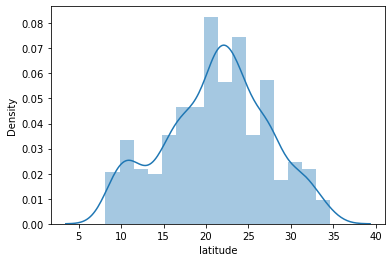

In [559]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

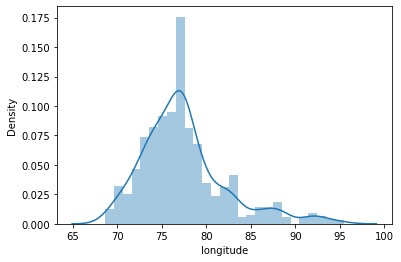

In [560]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='source', ylabel='Density'>

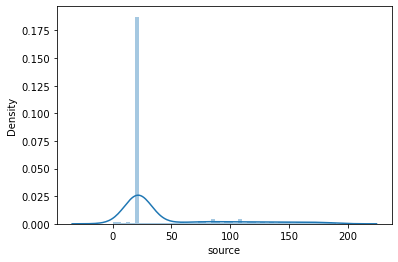

In [561]:
sns.distplot(df['source'])

In [562]:
# From the above visualisation it is clear that they are not Normally Distributed and skewness is present

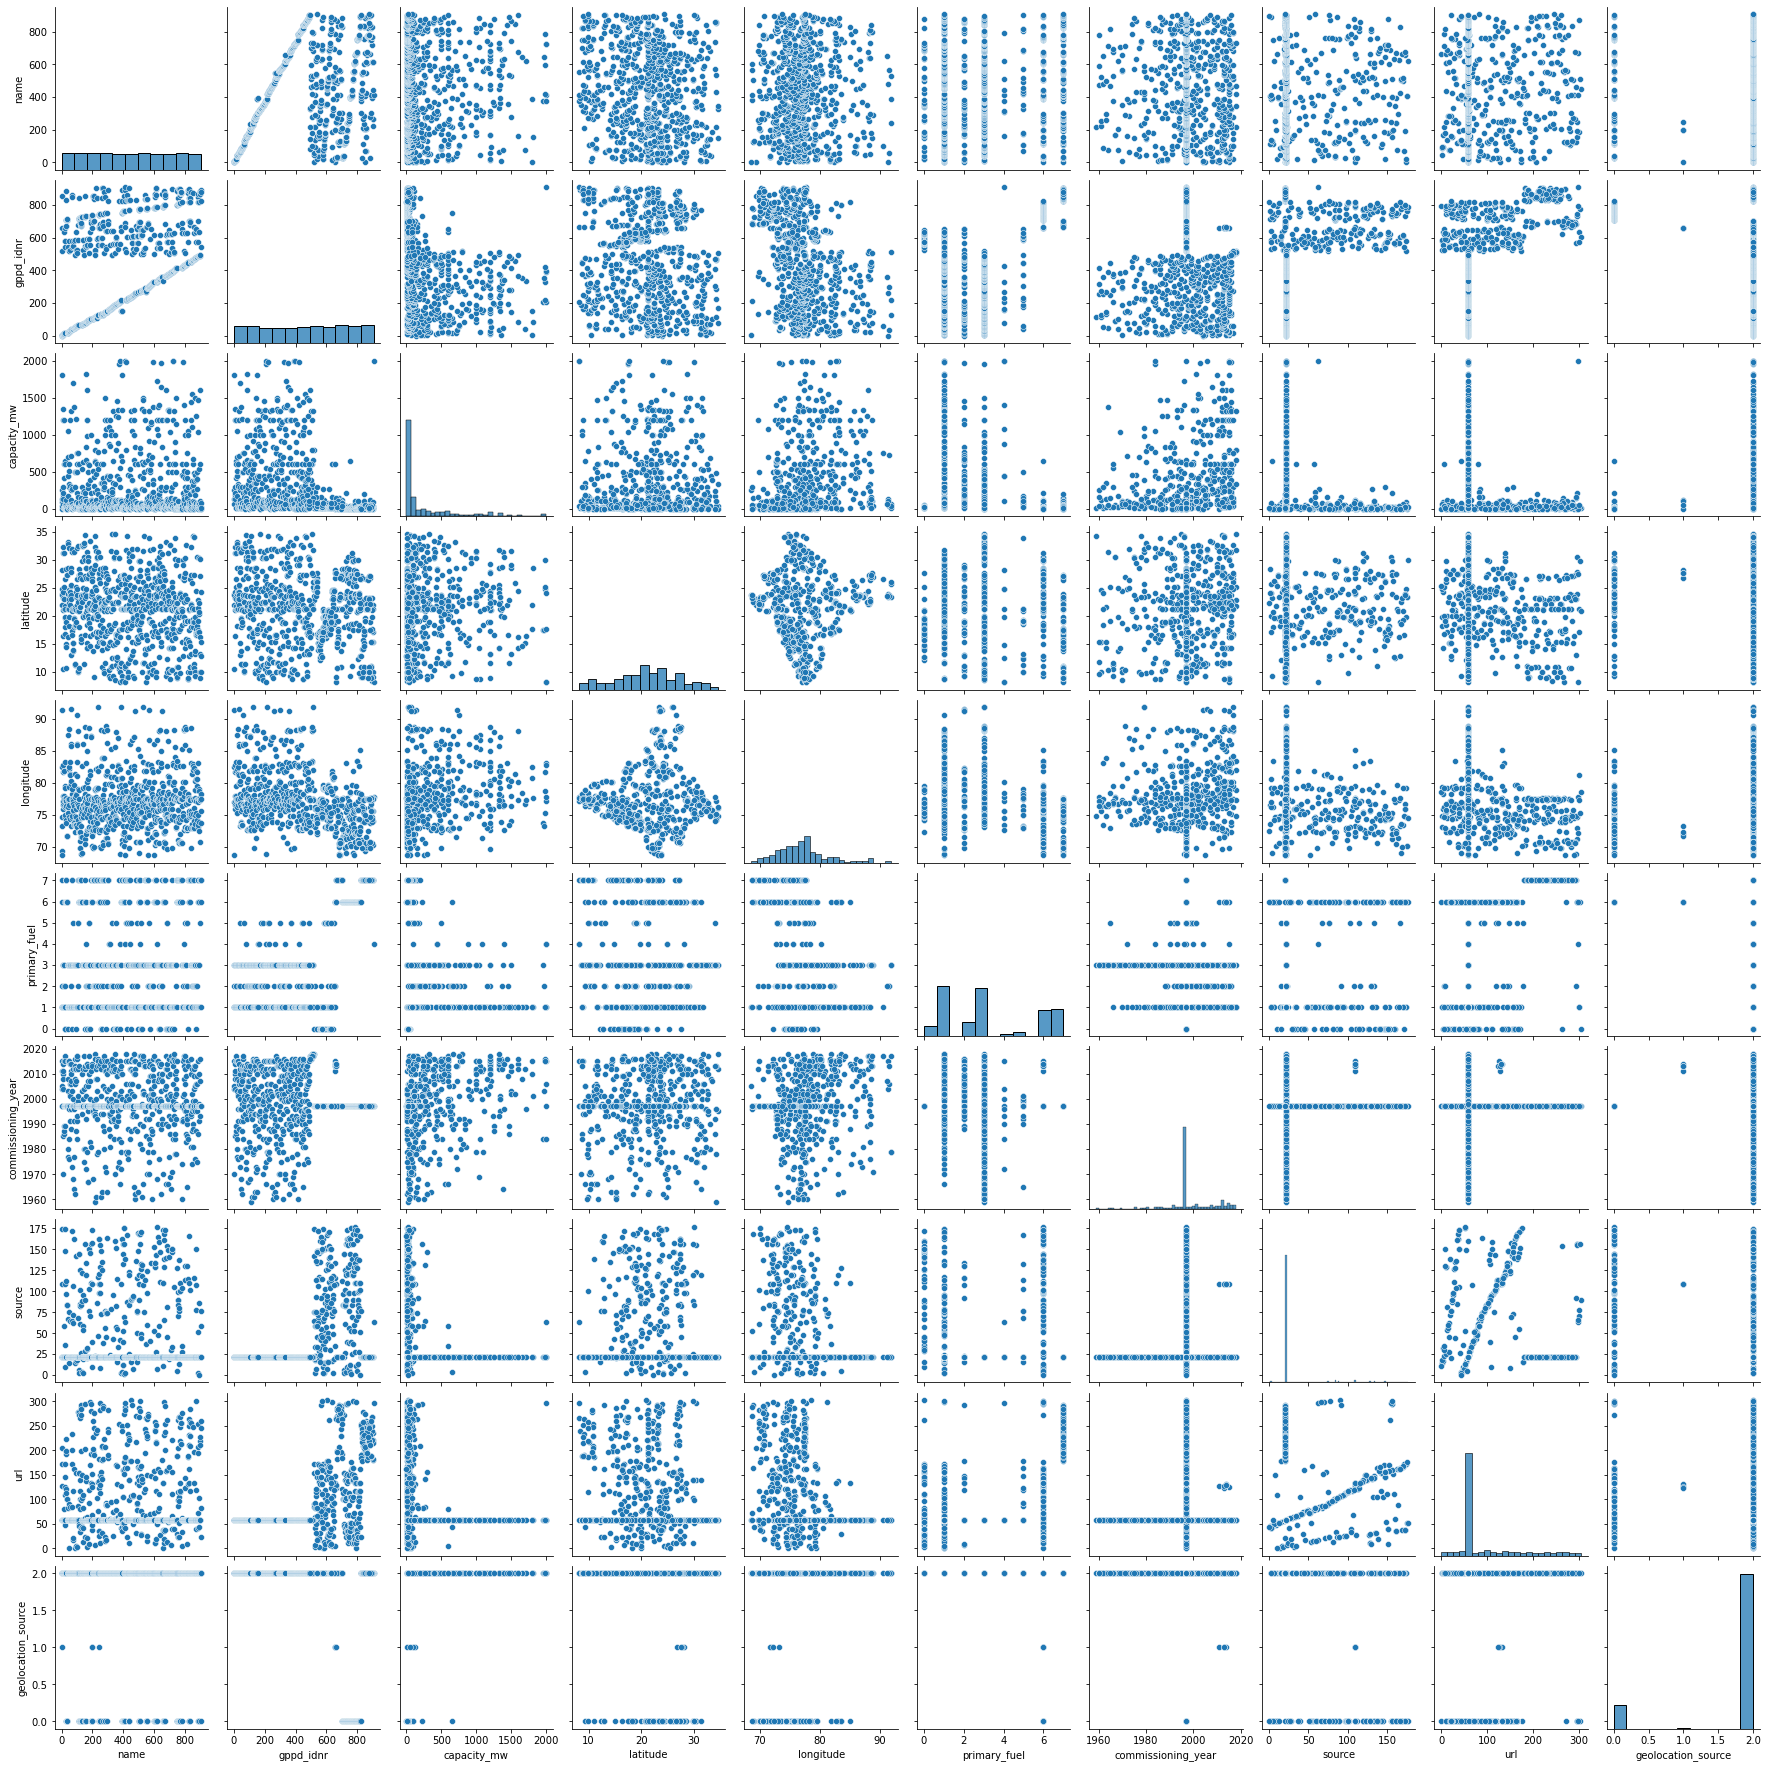

In [187]:
sns.pairplot(df)

In [563]:
# Now Lets Check for Outliers

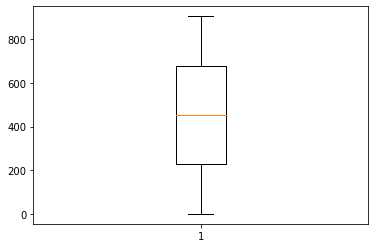

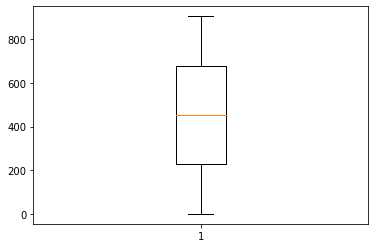

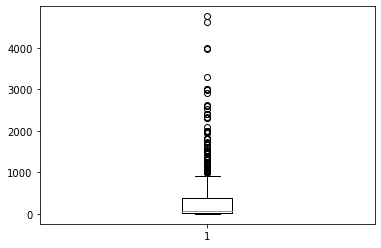

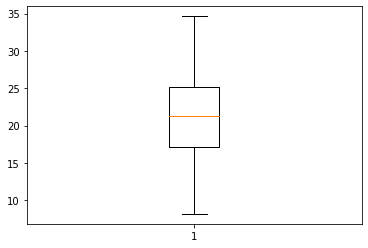

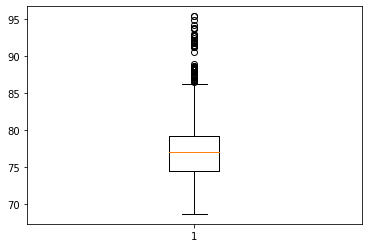

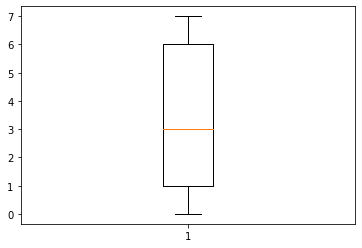

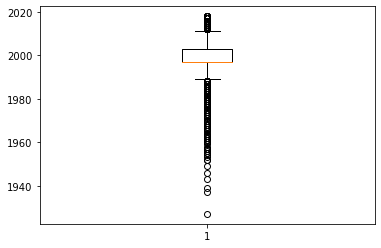

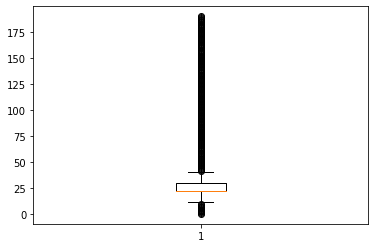

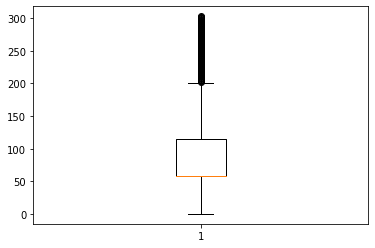

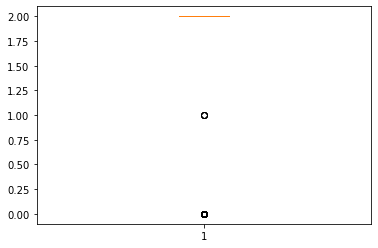

In [564]:
for i in df:
    plt.boxplot(df[i])
    plt.show()

In [565]:
# There are Outliers present in our DataSet

In [566]:
# Now Quantify outliers and remove them

In [567]:
from scipy.stats import zscore

In [568]:
z=np.abs(zscore(df))

In [569]:
np.where(z>3)

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
        321, 323, 333, 340, 342, 345, 360, 363, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 484, 493, 494, 499, 519, 538, 541, 546, 573,
        577, 583, 592, 601, 621, 638, 648, 657, 661, 669, 689, 695, 706,
        709, 726, 728, 767, 786, 788, 807, 808, 818, 832, 847, 848, 870,
        871, 879, 880, 895, 900], dtype=int64),
 array([2, 7, 7, 2, 2, 4, 4, 7, 2, 6, 4, 7, 2, 7, 4, 4, 4, 6, 7, 4, 2, 2,
        6, 2, 4, 4, 6, 6, 6, 2, 6, 2, 2, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 6,
        4, 2, 2, 7, 7, 7, 2, 6, 6, 2, 6, 2, 2, 2, 6, 2, 4, 7, 4, 6, 7, 7,
        7, 2, 7, 7], dtype=int64))

In [570]:
df=df[(z<3).all(axis=1)]

In [571]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0,657,2.5,28.1839,73.2407,6,2011.000000,109,128,1
1,1,519,98.0,24.7663,74.6090,1,1997.091082,174,173,2
2,2,853,39.2,21.9038,69.3732,7,1997.091082,21,205,2
3,3,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2
4,4,1,1800.0,21.9603,82.4091,1,2015.000000,22,58,2
...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2016.000000,22,58,2
903,903,822,3.0,12.8932,78.1654,6,1997.091082,77,22,0
904,904,891,25.5,15.2758,75.5811,7,1997.091082,21,260,2
905,905,539,80.0,24.3500,73.7477,1,1997.091082,59,82,2


In [572]:
# Now lets Check For Data Loss percentage

In [573]:
loss_percentage=(907-837)/907*100

In [574]:
loss_percentage

7.717750826901875

In [575]:
# So only 7.7 percent Data is lost

In [576]:
x1=df.iloc[:,[0,1,2,3,4,6,7,8,9]]

In [577]:
x1.shape

(837, 9)

In [578]:
y1=df.iloc[:,5]

In [579]:
y1.shape

(837,)

In [580]:
# Since Data Is imbalanced So Applying SMOTE balancing Technique

In [581]:
from imblearn.over_sampling import SMOTE

In [582]:
smt=SMOTE()

In [583]:
x1,y1=smt.fit_resample(x1,y1)

In [584]:
x1.shape

(1872, 9)

In [585]:
y1.shape

(1872,)

In [586]:
# Now Lets Remove skewness

In [587]:
x1.skew()

name                 -0.006417
gppd_idnr            -0.072949
capacity_mw           2.030960
latitude              0.087583
longitude             1.322834
commissioning_year   -0.923768
source                1.368110
url                   1.354596
geolocation_source   -2.333863
dtype: float64

In [588]:
from sklearn.preprocessing import power_transform

In [589]:
x1_new=power_transform(x1)

In [590]:
pd.DataFrame(x1_new,columns=x1.columns).skew().sort_values(ascending=False)

commissioning_year    0.102247
url                   0.034454
capacity_mw           0.027209
latitude             -0.032607
longitude            -0.039965
source               -0.125275
name                 -0.237441
gppd_idnr            -0.267859
geolocation_source   -2.307401
dtype: float64

In [591]:
# Since Geolocation source is object dtype so its skewness cannot be removed

In [592]:
x1=pd.DataFrame(x1_new,columns=x1.columns)

In [593]:
x1

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,source,url,geolocation_source
0,-2.271280,0.749571,-1.836288,1.460136,-0.891716,1.699902,1.437360,0.718754,-2.539875
1,-2.256849,0.247742,0.199621,0.874829,-0.382457,-0.122771,1.879646,1.202383,0.373321
2,-2.244030,1.423657,-0.317795,0.373820,-2.749128,-0.122771,-0.628420,1.482235,0.373321
3,-2.232158,-2.236768,0.376685,0.719290,2.691937,0.724594,-0.557979,-0.473815,0.373321
4,-2.220943,-2.222848,1.721801,0.383814,1.575415,2.315885,-0.557979,-0.473815,0.373321
...,...,...,...,...,...,...,...,...,...
1867,1.674596,1.546796,-0.566964,-0.844656,-0.051049,-0.122771,-0.628420,1.876657,0.373321
1868,1.225547,1.480380,-1.506781,0.248590,0.494791,-0.122771,-0.628420,1.856758,0.373321
1869,-0.258643,1.343145,-0.916501,-1.253433,0.227536,-0.122771,-0.628420,1.870046,0.373321
1870,1.420913,1.413621,-0.589120,-1.427920,0.249102,-0.122771,-0.628420,1.775032,0.373321


# Proceding further towards model where Target is Primary Fuel

In [594]:
# Checking Multi collinearity

In [595]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [596]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['Variable']=x1.columns
    vif['VIF']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    return vif

In [597]:
cal_vif(x1)

,Variable,VIF
0,name,1.389966
1,gppd_idnr,3.167841
2,capacity_mw,2.022737
3,latitude,1.128712
4,longitude,1.283176
5,commissioning_year,1.119395
6,source,1.274888
7,url,1.538766
8,geolocation_source,1.698228


In [598]:
# So it is clear that our columns does not suffer from multi collinearity

In [599]:
# Now Applying Scaling on dataset

In [600]:
from sklearn.preprocessing import StandardScaler

In [601]:
ss=StandardScaler()
x1=ss.fit_transform(x1)

In [602]:
x1

array([[-2.27127953,  0.74957063, -1.83628791, ...,  1.43735992,
         0.71875369, -2.53987537],
       [-2.25684899,  0.24774153,  0.19962071, ...,  1.87964632,
         1.20238315,  0.37332139],
       [-2.24403049,  1.42365706, -0.31779541, ..., -0.6284202 ,
         1.48223473,  0.37332139],
       ...,
       [-0.25864274,  1.34314514, -0.91650075, ..., -0.6284202 ,
         1.87004644,  0.37332139],
       [ 1.42091264,  1.41362106, -0.58911989, ..., -0.6284202 ,
         1.775032  ,  0.37332139],
       [-0.07542934,  1.33641245, -0.73215686, ..., -0.6284202 ,
         1.78197722,  0.37332139]])

In [603]:
# Moving towards our first model which is KNN

In [604]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [607]:
knn=KNeighborsClassifier()

In [609]:
for i in range(0,100):
    x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    knn.fit(x1train,y1train)
    predknn=knn.predict(x1test)
    knnacc=accuracy_score(y1test,predknn)
    print('At RandomState ',i,' Accuracy is ',knnacc*100)

At RandomState  0  Accuracy is  83.73333333333333
At RandomState  1  Accuracy is  82.39999999999999
At RandomState  2  Accuracy is  82.93333333333334
At RandomState  3  Accuracy is  83.46666666666667
At RandomState  4  Accuracy is  86.66666666666667
At RandomState  5  Accuracy is  82.39999999999999
At RandomState  6  Accuracy is  89.06666666666668
At RandomState  7  Accuracy is  86.4
At RandomState  8  Accuracy is  83.2
At RandomState  9  Accuracy is  84.53333333333333
At RandomState  10  Accuracy is  85.33333333333334
At RandomState  11  Accuracy is  81.6
At RandomState  12  Accuracy is  83.46666666666667
At RandomState  13  Accuracy is  84.8
At RandomState  14  Accuracy is  80.80000000000001
At RandomState  15  Accuracy is  82.93333333333334
At RandomState  16  Accuracy is  86.93333333333332
At RandomState  17  Accuracy is  85.86666666666667
At RandomState  18  Accuracy is  85.06666666666666
At RandomState  19  Accuracy is  86.66666666666667
At RandomState  20  Accuracy is  84.0
At R

In [610]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=6)
knn.fit(x1train,y1train)
predknn=knn.predict(x1test)
knnacc=accuracy_score(y1test,predknn)
print('At RandomState 6 Accuracy is ',knnacc*100)

At RandomState 6 Accuracy is  89.06666666666668


In [611]:
print('Confusion matrix \n',confusion_matrix(y1test,predknn))
print('classification_report \n',classification_report(y1test,predknn))

Confusion matrix 
 [[45  0  0  0  0  0  0  0]
 [ 3 29  2  5  2  1  0  0]
 [ 1  6 42  1  3  3  0  0]
 [ 0  4  7 32  0  2  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 0  0  0  1  0 48  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 39]]
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        45
           1       0.74      0.69      0.72        42
           2       0.82      0.75      0.79        56
           3       0.82      0.71      0.76        45
           4       0.91      1.00      0.95        52
           5       0.89      0.98      0.93        49
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        39

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



In [612]:
from sklearn.model_selection import cross_val_score

In [614]:
# Now Checking best CV

In [613]:
for i in range(2,10):
    cvknn=cross_val_score(knn,x1,y1,cv=i)
    cvknn_mean=cvknn.mean()
    print('At cv ',i,' cross_val_score is ',cvknn_mean*100,' with accuracy ',knnacc*100)

At cv  2  cross_val_score is  74.41239316239316  with accuracy  89.06666666666668
At cv  3  cross_val_score is  78.36538461538461  with accuracy  89.06666666666668
At cv  4  cross_val_score is  79.86111111111111  with accuracy  89.06666666666668
At cv  5  cross_val_score is  81.1977183600713  with accuracy  89.06666666666668
At cv  6  cross_val_score is  81.89102564102564  with accuracy  89.06666666666668
At cv  7  cross_val_score is  82.53096475887017  with accuracy  89.06666666666668
At cv  8  cross_val_score is  82.9594017094017  with accuracy  89.06666666666668
At cv  9  cross_val_score is  82.42521367521367  with accuracy  89.06666666666668


In [615]:
cvknn=cross_val_score(knn,x1,y1,cv=8)
cvknn_mean=cvknn.mean()
print('At cv 8 cross_val_score is ',cvknn_mean*100,' with accuracy ',knnacc*100)

At cv 8 cross_val_score is  82.9594017094017  with accuracy  89.06666666666668


In [616]:
# Now Using 2nd model which is SVC

In [617]:
from sklearn.svm import SVC

In [618]:
svc=SVC()

In [619]:
# Finding Best parameter using gridsearchCV

In [620]:
parameter={'kernel':['rbf','poly','linear']}
gscv=GridSearchCV(svc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'kernel': 'rbf'}


In [621]:
svc=SVC(kernel='rbf')

In [622]:
for i in range(0,100):
    x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    svc.fit(x1train,y1train)
    predsvc=svc.predict(x1test)
    svcacc=accuracy_score(y1test,predsvc)
    print('At Random State ',i,' Accuracy is ',svcacc*100)

At Random State  0  Accuracy is  84.0
At Random State  1  Accuracy is  85.6
At Random State  2  Accuracy is  84.0
At Random State  3  Accuracy is  86.66666666666667
At Random State  4  Accuracy is  86.93333333333332
At Random State  5  Accuracy is  82.39999999999999
At Random State  6  Accuracy is  87.73333333333333
At Random State  7  Accuracy is  84.8
At Random State  8  Accuracy is  81.86666666666666
At Random State  9  Accuracy is  81.86666666666666
At Random State  10  Accuracy is  85.33333333333334
At Random State  11  Accuracy is  82.93333333333334
At Random State  12  Accuracy is  85.06666666666666
At Random State  13  Accuracy is  85.06666666666666
At Random State  14  Accuracy is  83.73333333333333
At Random State  15  Accuracy is  83.73333333333333
At Random State  16  Accuracy is  84.53333333333333
At Random State  17  Accuracy is  82.66666666666667
At Random State  18  Accuracy is  84.8
At Random State  19  Accuracy is  87.2
At Random State  20  Accuracy is  84.26666666666

In [623]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=33)
svc.fit(x1train,y1train)
predsvc=svc.predict(x1test)
svcacc=accuracy_score(y1test,predsvc)
print('At Random State 33 Accuracy is ',svcacc*100)

At Random State 33 Accuracy is  88.26666666666667


In [624]:
print('Confussion Matrix \n',confusion_matrix(y1test,predsvc))
print('classification report\n',classification_report(y1test,predsvc))

Confussion Matrix 
 [[48  1  0  0  0  0  0  0]
 [ 4 30  5  6  6  0  0  0]
 [ 0  4 29  0  3  5  0  0]
 [ 0  1  2 32  5  1  0  0]
 [ 0  0  0  0 56  0  0  0]
 [ 0  0  0  1  0 36  0  0]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 42]]
classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.83      0.59      0.69        51
           2       0.81      0.71      0.75        41
           3       0.82      0.78      0.80        41
           4       0.80      1.00      0.89        56
           5       0.86      0.97      0.91        37
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        42

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.87       375
weighted avg       0.88      0.88      0.88       375



In [625]:
# Now Checking CV of SVC

In [626]:
for i in range(2,10):
    cvsvc=cross_val_score(svc,x1,y1,cv=i)
    cvsvc_mean=cvsvc.mean()
    print('At CV ',i,' Cross Val Score is ',cvsvc_mean*100,' with SVC accuracy ',svcacc*100)

At CV  2  Cross Val Score is  73.98504273504274  with SVC accuracy  88.26666666666667
At CV  3  Cross Val Score is  79.38034188034187  with SVC accuracy  88.26666666666667
At CV  4  Cross Val Score is  81.46367521367522  with SVC accuracy  88.26666666666667
At CV  5  Cross Val Score is  83.33575757575758  with SVC accuracy  88.26666666666667
At CV  6  Cross Val Score is  83.65384615384616  with SVC accuracy  88.26666666666667
At CV  7  Cross Val Score is  83.76316651094447  with SVC accuracy  88.26666666666667
At CV  8  Cross Val Score is  84.02777777777777  with SVC accuracy  88.26666666666667
At CV  9  Cross Val Score is  84.1880341880342  with SVC accuracy  88.26666666666667


In [627]:
cvsvc=cross_val_score(svc,x1,y1,cv=9)
cvsvc_mean=cvsvc.mean()
print('At CV 9 Cross Val Score is ',cvsvc_mean*100,' with SVC accuracy ',svcacc*100)

At CV 9 Cross Val Score is  84.1880341880342  with SVC accuracy  88.26666666666667


In [628]:
# Now Using 3rd model DecisionTreeClassifier

In [629]:
from sklearn.tree import DecisionTreeClassifier

In [630]:
dtc=DecisionTreeClassifier()

In [631]:
# Finding Best Parameter using GridsearchCV

In [460]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','auto','log2']}
gscv=GridSearchCV(dtc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'criterion': 'log_loss', 'max_features': 'auto'}


In [632]:
dtc=DecisionTreeClassifier(criterion='log_loss',max_features='auto')
dtc.fit(x1train,y1train)
preddtc=dtc.predict(x1test)
dtcacc=accuracy_score(y1test,preddtc)
print('Accuracy Score is ',dtcacc*100)
print('Confusion Matrix\n',confusion_matrix(y1test,preddtc))
print('Classification report\n',classification_report(y1test,preddtc))

Accuracy Score is  85.6
Confusion Matrix
 [[48  1  0  0  0  0  0  0]
 [ 1 36  4  6  4  0  0  0]
 [ 0  8 26  3  2  2  0  0]
 [ 0  5  5 28  2  1  0  0]
 [ 0  2  1  4 49  0  0  0]
 [ 0  1  0  2  0 34  0  0]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 42]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.68      0.71      0.69        51
           2       0.72      0.63      0.68        41
           3       0.65      0.68      0.67        41
           4       0.86      0.88      0.87        56
           5       0.92      0.92      0.92        37
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        42

    accuracy                           0.86       375
   macro avg       0.85      0.85      0.85       375
weighted avg       0.86      0.86      0.86       375



In [633]:
# Now checking its CV

In [634]:
for i in range(2,10):
    cvdtc=cross_val_score(dtc,x1,y1,cv=i)
    cvdtc_mean=cvdtc.mean()
    print('At CV ',i,' Cross Val Score is ',cvdtc_mean*100,' with accuracy ',dtcacc*100)

At CV  2  Cross Val Score is  72.16880341880342  with accuracy  85.6
At CV  3  Cross Val Score is  75.48076923076924  with accuracy  85.6
At CV  4  Cross Val Score is  81.51709401709402  with accuracy  85.6
At CV  5  Cross Val Score is  80.93076648841354  with accuracy  85.6
At CV  6  Cross Val Score is  82.05128205128204  with accuracy  85.6
At CV  7  Cross Val Score is  81.78429681448297  with accuracy  85.6
At CV  8  Cross Val Score is  83.49358974358974  with accuracy  85.6
At CV  9  Cross Val Score is  82.15811965811965  with accuracy  85.6


In [635]:
cvdtc=cross_val_score(dtc,x1,y1,cv=8)
cvdtc_mean=cvdtc.mean()
print('At CV 8 Cross Val Score is ',cvdtc_mean*100,' with accuracy ',dtcacc*100)

At CV 8 Cross Val Score is  83.65384615384615  with accuracy  85.6


In [636]:
# Using 4th model RandomForestClassifier

In [637]:
from sklearn.ensemble import RandomForestClassifier

In [638]:
rfc=RandomForestClassifier()

In [639]:
# Finding Best paramters using GridSearchCV

In [466]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','None']}
gscv=GridSearchCV(rfc,parameter)
gscv.fit(x1train,y1train)
print(gscv.best_params_)

{'criterion': 'log_loss', 'max_features': 'sqrt'}


In [640]:
rfc=RandomForestClassifier(criterion='log_loss',max_features='sqrt')
rfc.fit(x1train,y1train)
predrfc=rfc.predict(x1test)
rfcacc=accuracy_score(y1test,predrfc)
print('Accuracy Score is ',rfcacc*100)
print('Confusion matrix\n',confusion_matrix(y1test,predrfc))
print('classification report\n',classification_report(y1test,predrfc))

Accuracy Score is  94.39999999999999
Confusion matrix
 [[49  0  0  0  0  0  0  0]
 [ 1 41  5  2  2  0  0  0]
 [ 0  3 34  1  1  2  0  0]
 [ 0  0  1 37  2  1  0  0]
 [ 0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 42]]
classification report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.93      0.80      0.86        51
           2       0.85      0.83      0.84        41
           3       0.93      0.90      0.91        41
           4       0.92      1.00      0.96        56
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        42

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375



In [641]:
# Now checking CV for randomForestClassifier


In [643]:
for i in range(2,10):
    cvrfc=cross_val_score(rfc,x1,y1,cv=i)
    cvrfc_mean=cvrfc.mean()
    print('At CV ',i,' Cross Val Score is ',cvrfc_mean*100,' With RandomForest Accuracy ',rfcacc*100)

At CV  2  Cross Val Score is  75.05341880341881  With RandomForest Accuracy  94.39999999999999
At CV  3  Cross Val Score is  82.31837606837607  With RandomForest Accuracy  94.39999999999999
At CV  4  Cross Val Score is  85.63034188034187  With RandomForest Accuracy  94.39999999999999
At CV  5  Cross Val Score is  88.40841354723707  With RandomForest Accuracy  94.39999999999999
At CV  6  Cross Val Score is  88.9423076923077  With RandomForest Accuracy  94.39999999999999
At CV  7  Cross Val Score is  89.47557557317745  With RandomForest Accuracy  94.39999999999999
At CV  8  Cross Val Score is  89.42307692307692  With RandomForest Accuracy  94.39999999999999
At CV  9  Cross Val Score is  89.90384615384615  With RandomForest Accuracy  94.39999999999999


In [644]:
cvrfc=cross_val_score(rfc,x1,y1,cv=9)
cvrfc_mean=cvrfc.mean()
print('At CV 9 Cross Val Score is ',cvrfc_mean*100,' With RandomForest Accuracy ',rfcacc*100)

At CV 9 Cross Val Score is  89.74358974358974  With RandomForest Accuracy  94.39999999999999


In [645]:
# So Best Model For Classification is Random Forest Classifier

# Proceding Towards Model for where Target is capacity_mw

In [649]:
x2=df.iloc[:,[0,1,3,4,5,6,7,8,9]]

In [650]:
x2

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0,657,28.1839,73.2407,6,2011.000000,109,128,1
1,1,519,24.7663,74.6090,1,1997.091082,174,173,2
2,2,853,21.9038,69.3732,7,1997.091082,21,205,2
3,3,0,23.8712,91.3602,2,2004.000000,22,58,2
4,4,1,21.9603,82.4091,1,2015.000000,22,58,2
...,...,...,...,...,...,...,...,...,...
902,902,491,16.2949,77.3568,1,2016.000000,22,58,2
903,903,822,12.8932,78.1654,6,1997.091082,77,22,0
904,904,891,15.2758,75.5811,7,1997.091082,21,260,2
905,905,539,24.3500,73.7477,1,1997.091082,59,82,2


In [651]:
x2.shape

(837, 9)

In [652]:
y2=df.iloc[:,2]

In [653]:
y2

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 837, dtype: float64

In [654]:
y2.shape

(837,)

In [655]:
x2.skew()

name                  0.021286
gppd_idnr            -0.048629
latitude             -0.112961
longitude             0.902538
primary_fuel          0.417885
commissioning_year   -0.841353
source                1.790332
url                   1.437903
geolocation_source   -2.110249
dtype: float64

In [656]:
from sklearn.preprocessing import power_transform

In [657]:
x2_new=power_transform(x2)

In [658]:
pd.DataFrame(x2_new,columns=x2.columns).skew().sort_values(ascending=False)

url                   0.064581
commissioning_year    0.027326
longitude             0.000159
primary_fuel         -0.055927
latitude             -0.071294
source               -0.181446
name                 -0.286197
gppd_idnr            -0.313817
geolocation_source   -2.082067
dtype: float64

In [659]:
x2=pd.DataFrame(x2_new,columns=x2.columns)

In [660]:
# Now Checking for multicollinearity

In [661]:
def cal_vif(x2):
    vif=pd.DataFrame()
    vif['Variable']=x2.columns
    vif['VIF']=[variance_inflation_factor(x2.values,i)for i in range(x2.shape[1])]
    return vif

In [662]:
cal_vif(x2)

,Variable,VIF
0,name,1.366925
1,gppd_idnr,2.490871
2,latitude,1.121142
3,longitude,1.349467
4,primary_fuel,2.338470
5,commissioning_year,1.111905
6,source,1.554986
7,url,1.935543
8,geolocation_source,2.348250


In [663]:
# There is no multicollinearity

In [664]:
# Now Applying StandardScaling

In [665]:
x2=ss.fit_transform(x2)

In [666]:
x2

array([[-2.16484923,  0.75859057,  1.15986298, ...,  1.61816351,
         0.72492382, -2.28883255],
       [-2.14390286,  0.3016856 ,  0.59252364, ...,  2.09238953,
         1.19954567,  0.40307626],
       [-2.12611435,  1.36464901,  0.12110921, ..., -0.46748861,
         1.47653193,  0.40307626],
       ...,
       [ 1.54769916,  1.4774898 , -0.95469201, ..., -0.46748861,
         1.87638434,  0.40307626],
       [ 1.55055549,  0.36979758,  0.52374091, ...,  0.91971001,
         0.06197846,  0.40307626],
       [ 1.55341084,  1.4331082 , -1.80103754, ..., -0.46748861,
         1.77508445,  0.40307626]])

In [667]:
# Moving Ahead with 1st model Linear Rigression

In [755]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [672]:
lr=LinearRegression()
for i in range(0,100):
    x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    lr.fit(x2train,y2train)
    predlr=lr.predict(x2test)
    lracc=r2_score(y2test,predlr)
    print('At Random state ',i,' Acuuracy is ',lracc*100)

At Random state  0  Acuuracy is  29.294542734598885
At Random state  1  Acuuracy is  37.47969496489802
At Random state  2  Acuuracy is  34.16595159528427
At Random state  3  Acuuracy is  35.84138118443523
At Random state  4  Acuuracy is  30.90339272356315
At Random state  5  Acuuracy is  32.535590390180744
At Random state  6  Acuuracy is  39.608621236141836
At Random state  7  Acuuracy is  26.613000542026775
At Random state  8  Acuuracy is  28.144202810541152
At Random state  9  Acuuracy is  25.07646357512261
At Random state  10  Acuuracy is  35.88838632807225
At Random state  11  Acuuracy is  36.73882308775156
At Random state  12  Acuuracy is  28.322184813637218
At Random state  13  Acuuracy is  33.481547629353926
At Random state  14  Acuuracy is  39.79702152021436
At Random state  15  Acuuracy is  34.05529085175881
At Random state  16  Acuuracy is  35.64465618179249
At Random state  17  Acuuracy is  34.53038280901385
At Random state  18  Acuuracy is  17.35331985319506
At Random state

In [756]:
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=97)
lr.fit(x2train,y2train)
predlr=lr.predict(x2test)
lracc=r2_score(y2test,predlr)
print('At Random state 97 Acuuracy is ',lracc*100)
print('mean squared error',mean_squared_error(y2test,predlr))
print('mean absolute error',mean_absolute_error(y2test,predlr))

At Random state 97 Acuuracy is  43.14766291330755
mean squared error 96596.15547215592
mean absolute error 229.6094499968797


In [674]:
# Now Checking CV

In [675]:
for i in range(2,10):
    cvlr=cross_val_score(lr,x2,y2,cv=i)
    cvlr_mean=cvlr.mean()
    print('At CV ',i,' Cross Val Score is ',cvlr_mean*100,' with accuracy ',lracc*100)

At CV  2  Cross Val Score is  25.446628517490343  with accuracy  43.14766291330755
At CV  3  Cross Val Score is  29.08254021855768  with accuracy  43.14766291330755
At CV  4  Cross Val Score is  30.45424488242523  with accuracy  43.14766291330755
At CV  5  Cross Val Score is  31.588244234590945  with accuracy  43.14766291330755
At CV  6  Cross Val Score is  31.949967131228558  with accuracy  43.14766291330755
At CV  7  Cross Val Score is  31.314199791190404  with accuracy  43.14766291330755
At CV  8  Cross Val Score is  32.34835902994457  with accuracy  43.14766291330755
At CV  9  Cross Val Score is  32.04226786728548  with accuracy  43.14766291330755


In [676]:
cvlr=cross_val_score(lr,x2,y2,cv=8)
cvlr_mean=cvlr.mean()
print('At CV 8 Cross Val Score is ',cvlr_mean*100,' with accuracy ',lracc*100)

At CV 8 Cross Val Score is  32.34835902994457  with accuracy  43.14766291330755


In [677]:
# Now Moving Towards 2nd model Lasso

In [678]:
from sklearn.linear_model import Lasso

In [679]:
ls=Lasso()

In [680]:
# Finding Best parameters using gridseachCV

In [681]:
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvls=GridSearchCV(ls,parameter)
gscvls.fit(x2train,y2train)
print(gscvls.best_params_)

{'alpha': 1, 'random_state': 0}


In [757]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x2train,y2train)
predls=ls.predict(x2test)
lsacc=r2_score(y2test,predls)
print('mse ',mean_squared_error(y2test,predls))
print('mae ',mean_absolute_error(y2test,predls) )

mse  96806.10112678455
mae  229.15100507594832


In [683]:
# Now Finding Best CV

In [685]:
for i in range(2,10):
    cvls=cross_val_score(ls,x2,y2,cv=i)
    cvls_mean=cvls.mean()
    print('At CV ',i,' Cross_val_score is ',cvls_mean*100,' with Lasso accuracy ',lsacc*100)

At CV  2  Cross_val_score is  26.165650127331197  with Lasso accuracy  43.024097942543534
At CV  3  Cross_val_score is  29.46419445685643  with Lasso accuracy  43.024097942543534
At CV  4  Cross_val_score is  30.648551707309537  with Lasso accuracy  43.024097942543534
At CV  5  Cross_val_score is  31.745252263421442  with Lasso accuracy  43.024097942543534
At CV  6  Cross_val_score is  32.10462580616405  with Lasso accuracy  43.024097942543534
At CV  7  Cross_val_score is  31.43561469040733  with Lasso accuracy  43.024097942543534
At CV  8  Cross_val_score is  32.48290165716959  with Lasso accuracy  43.024097942543534
At CV  9  Cross_val_score is  32.18301133970886  with Lasso accuracy  43.024097942543534


In [686]:
# Best CV is 8

In [687]:
cvls=cross_val_score(ls,x2,y2,cv=8)
cvls_mean=cvls.mean()
print('At CV 8 Cross_val_score is ',cvls_mean*100,' with Lasso accuracy ',lsacc*100)

At CV 8 Cross_val_score is  32.48290165716959  with Lasso accuracy  43.024097942543534


In [688]:
# Using 3rd model Ridge

In [689]:
from sklearn.linear_model import Ridge

In [690]:
# Finding Best Parameter using Grid SearchCV

In [691]:
rg=Ridge()
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvrg=GridSearchCV(rg,parameter)
gscvrg.fit(x2train,y2train)
print(gscvrg.best_params_)

{'alpha': 10, 'random_state': 0}


In [694]:
rg=Ridge(alpha=10,random_state=0)
rg.fit(x2train,y2train)
predrg=rg.predict(x2test)
rgacc=r2_score(y2test,predrg)

In [695]:
# Checking CV

In [696]:
for i in range(2,10):
    cvrg=cross_val_score(rg,x2,y2,cv=i)
    cvrg_mean=cvrg.mean()
    print('At CV ',i,' cross val score is ',cvrg_mean*100,' with Ridge Accuracy ',rgacc*100)

At CV  2  cross val score is  27.408591955111973  with Ridge Accuracy  27.58991343358025
At CV  3  cross val score is  29.974721122176224  with Ridge Accuracy  27.58991343358025
At CV  4  cross val score is  30.823081155534215  with Ridge Accuracy  27.58991343358025
At CV  5  cross val score is  31.80884927237953  with Ridge Accuracy  27.58991343358025
At CV  6  cross val score is  32.18132762350037  with Ridge Accuracy  27.58991343358025
At CV  7  cross val score is  31.470062913512653  with Ridge Accuracy  27.58991343358025
At CV  8  cross val score is  32.48586110667892  with Ridge Accuracy  27.58991343358025
At CV  9  cross val score is  32.20838963046769  with Ridge Accuracy  27.58991343358025


In [758]:
cvrg=cross_val_score(rg,x2,y2,cv=8)
cvrg_mean=cvrg.mean()
print('At CV 8 cross val score is ',cvrg_mean*100,' with Ridge Accuracy ',rgacc*100)
print('mse ',mean_squared_error(y2test,predrg))
print('mae ',mean_absolute_error(y2test,predrg))

At CV 8 cross val score is  32.48586110667892  with Ridge Accuracy  27.58991343358025
mse  230782.2848809341
mae  349.00504274183277


In [698]:
# Using 4th Model RandomForestRegressor

In [699]:
from sklearn.ensemble import RandomForestRegressor

In [700]:
rf=RandomForestRegressor()

In [701]:
# Finding Best Parameters Using GridSearchCV

In [761]:
parameter={'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto','sqrt','log2']}
gscvrf=GridSearchCV(rf,parameter)
gscvrf.fit(x2train,y2train)
print(gscvrf.best_params_)

{'criterion': 'poisson', 'max_features': 'log2'}


In [762]:
rf=RandomForestRegressor(criterion='poisson',max_features='log2')
rf.fit(x2train,y2train)
predrf=rf.predict(x2test)
rfacc=r2_score(y2test,predrf)

In [763]:
print(rfacc*100)

55.244422151708505


In [764]:
# Checking Best CV

In [765]:
for i in range(2,10):
    cvrf=cross_val_score(rf,x2,y2,cv=i)
    cvrf_mean=cvrf.mean()
    print('At cv ',i,' Cross Val score is ',cvrf_mean*100,' with Random Forest Accuracy ',rfacc*100)

At cv  2  Cross Val score is  47.193251260164615  with Random Forest Accuracy  55.244422151708505
At cv  3  Cross Val score is  48.06640059383396  with Random Forest Accuracy  55.244422151708505
At cv  4  Cross Val score is  46.11767727660306  with Random Forest Accuracy  55.244422151708505
At cv  5  Cross Val score is  45.440411440576675  with Random Forest Accuracy  55.244422151708505
At cv  6  Cross Val score is  45.078837755082766  with Random Forest Accuracy  55.244422151708505
At cv  7  Cross Val score is  45.67701590206054  with Random Forest Accuracy  55.244422151708505
At cv  8  Cross Val score is  49.830320521296635  with Random Forest Accuracy  55.244422151708505
At cv  9  Cross Val score is  47.83820510390623  with Random Forest Accuracy  55.244422151708505


In [766]:
cvrf=cross_val_score(rf,x2,y2,cv=8)
cvrf_mean=cvrf.mean()
print('At cv 8 Cross Val score is ',cvrf_mean*100,' with Random Forest Accuracy ',rfacc*100)

At cv 8 Cross Val score is  50.228644143278785  with Random Forest Accuracy  55.244422151708505


In [767]:
print('mse ',mean_squared_error(y2test,predrf))
print('mae ',mean_absolute_error(y2test,predrf))

mse  76042.90302942863
mae  169.46630916666666


In [768]:
# So Based On above Observation Random Forest Regressor is Best Model

# Saving best models

In [769]:
import pickle

In [770]:
filename1='primaryfuelc.pkl'
pickle.dump(rfc,open(filename1,'wb'))

In [771]:
output1=pickle.load(open('primaryfuelc.pkl','rb'))
result1=output1.score(x1test,y1test)
result1*100

94.39999999999999

In [772]:
model1=pd.DataFrame([output1.predict(x1test)[:],(predrfc)[:]],index=['actual','predicted'])
model1

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
actual,1,7,6,2,6,6,5,4,4,5,...,5,5,3,3,3,2,6,3,3,0
predicted,1,7,6,2,6,6,5,4,4,5,...,5,5,3,3,3,2,6,3,3,0


In [782]:
# This is Our Model For prediction of primary Fuel

In [778]:
filename2='capacitymw.pkl'
pickle.dump(rf,open(filename2,'wb'))

In [779]:
output2=pickle.load(open('capacitymw.pkl','rb'))
result2=output2.score(x2test,y2test)
result2*100

55.244422151708505

In [781]:
model2=pd.DataFrame([output2.predict(x2test)[:],(predrf)[:]],index=['actual','predicted'])
model2

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
actual,220.657,56.191,521.36,18.868,40.54,37.6545,139.4735,833.57,844.5783,925.95,...,825.55,37.2544,385.59808,64.6175,371.1363,260.6357,365.2858,22.47972,83.548,320.89434
predicted,220.657,56.191,521.36,18.868,40.54,37.6545,139.4735,833.57,844.5783,925.95,...,825.55,37.2544,385.59808,64.6175,371.1363,260.6357,365.2858,22.47972,83.548,320.89434


In [783]:
# This Is our Model for predicton of Capacity